In [4]:
# I will use in this Kernel the step-by-step process of Will Koehrsen.
# I won't use everything, but most of them.
# This project at in GitHub repository: https://github.com/WillKoehrsen/machine-learning-project-walkthrough

In [5]:
##### # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [6]:
# # # Data Cleaning and Formatting

# # Load in the Data and Examine

# Read in credit into a dataframe 
credit = pd.read_csv('../input/credit_train.csv')

# Display top of dataframe
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [7]:
credit.shape

(100514, 19)

In [8]:
# # Data Types and Missing Values

# See the column data types and non-missing values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [9]:
# Statistics for each column
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [10]:
credit.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [11]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [12]:
missing_values_table(credit)

Your selected dataframe has 17 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


In [13]:
# Drop the columns with > 50% missing
credit.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [14]:
credit[credit['Years of Credit History'].isnull() == True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for i in credit[credit['Years of Credit History'].isnull() == True].index:
    print(i)

100000
100001
100002
100003
100004
100005
100006
100007
100008
100009
100010
100011
100012
100013
100014
100015
100016
100017
100018
100019
100020
100021
100022
100023
100024
100025
100026
100027
100028
100029
100030
100031
100032
100033
100034
100035
100036
100037
100038
100039
100040
100041
100042
100043
100044
100045
100046
100047
100048
100049
100050
100051
100052
100053
100054
100055
100056
100057
100058
100059
100060
100061
100062
100063
100064
100065
100066
100067
100068
100069
100070
100071
100072
100073
100074
100075
100076
100077
100078
100079
100080
100081
100082
100083
100084
100085
100086
100087
100088
100089
100090
100091
100092
100093
100094
100095
100096
100097
100098
100099
100100
100101
100102
100103
100104
100105
100106
100107
100108
100109
100110
100111
100112
100113
100114
100115
100116
100117
100118
100119
100120
100121
100122
100123
100124
100125
100126
100127
100128
100129
100130
100131
100132
100133
100134
100135
100136
100137
100138
100139
100140
100141
100142

In [16]:
credit.drop(credit.tail(514).index, inplace=True) # drop last 514 rows
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [17]:
for i in credit['Maximum Open Credit'][credit['Maximum Open Credit'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19153,19.2
Annual Income,19153,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0


In [18]:
for i in credit['Tax Liens'][credit['Tax Liens'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19149,19.2
Annual Income,19149,19.2
Years in current job,4222,4.2
Bankruptcies,194,0.2


In [19]:
for i in credit['Bankruptcies'][credit['Bankruptcies'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)
missing_values_table(credit)


Your selected dataframe has 16 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19111,19.2
Annual Income,19111,19.2
Years in current job,4222,4.2


In [20]:
credit.fillna(credit.mean(), inplace=True)
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,4222,4.2


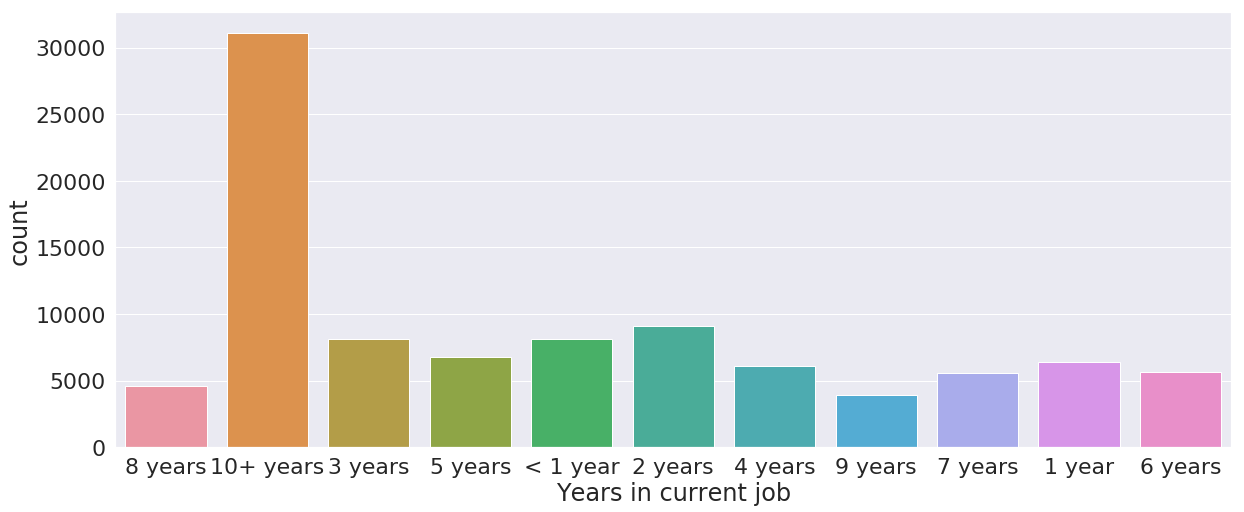

In [21]:
plt.figure(figsize=(20,8))

sns.countplot(credit['Years in current job'])

In [22]:
credit.fillna('10+ years', inplace=True)
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


/opt/conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
/opt/conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


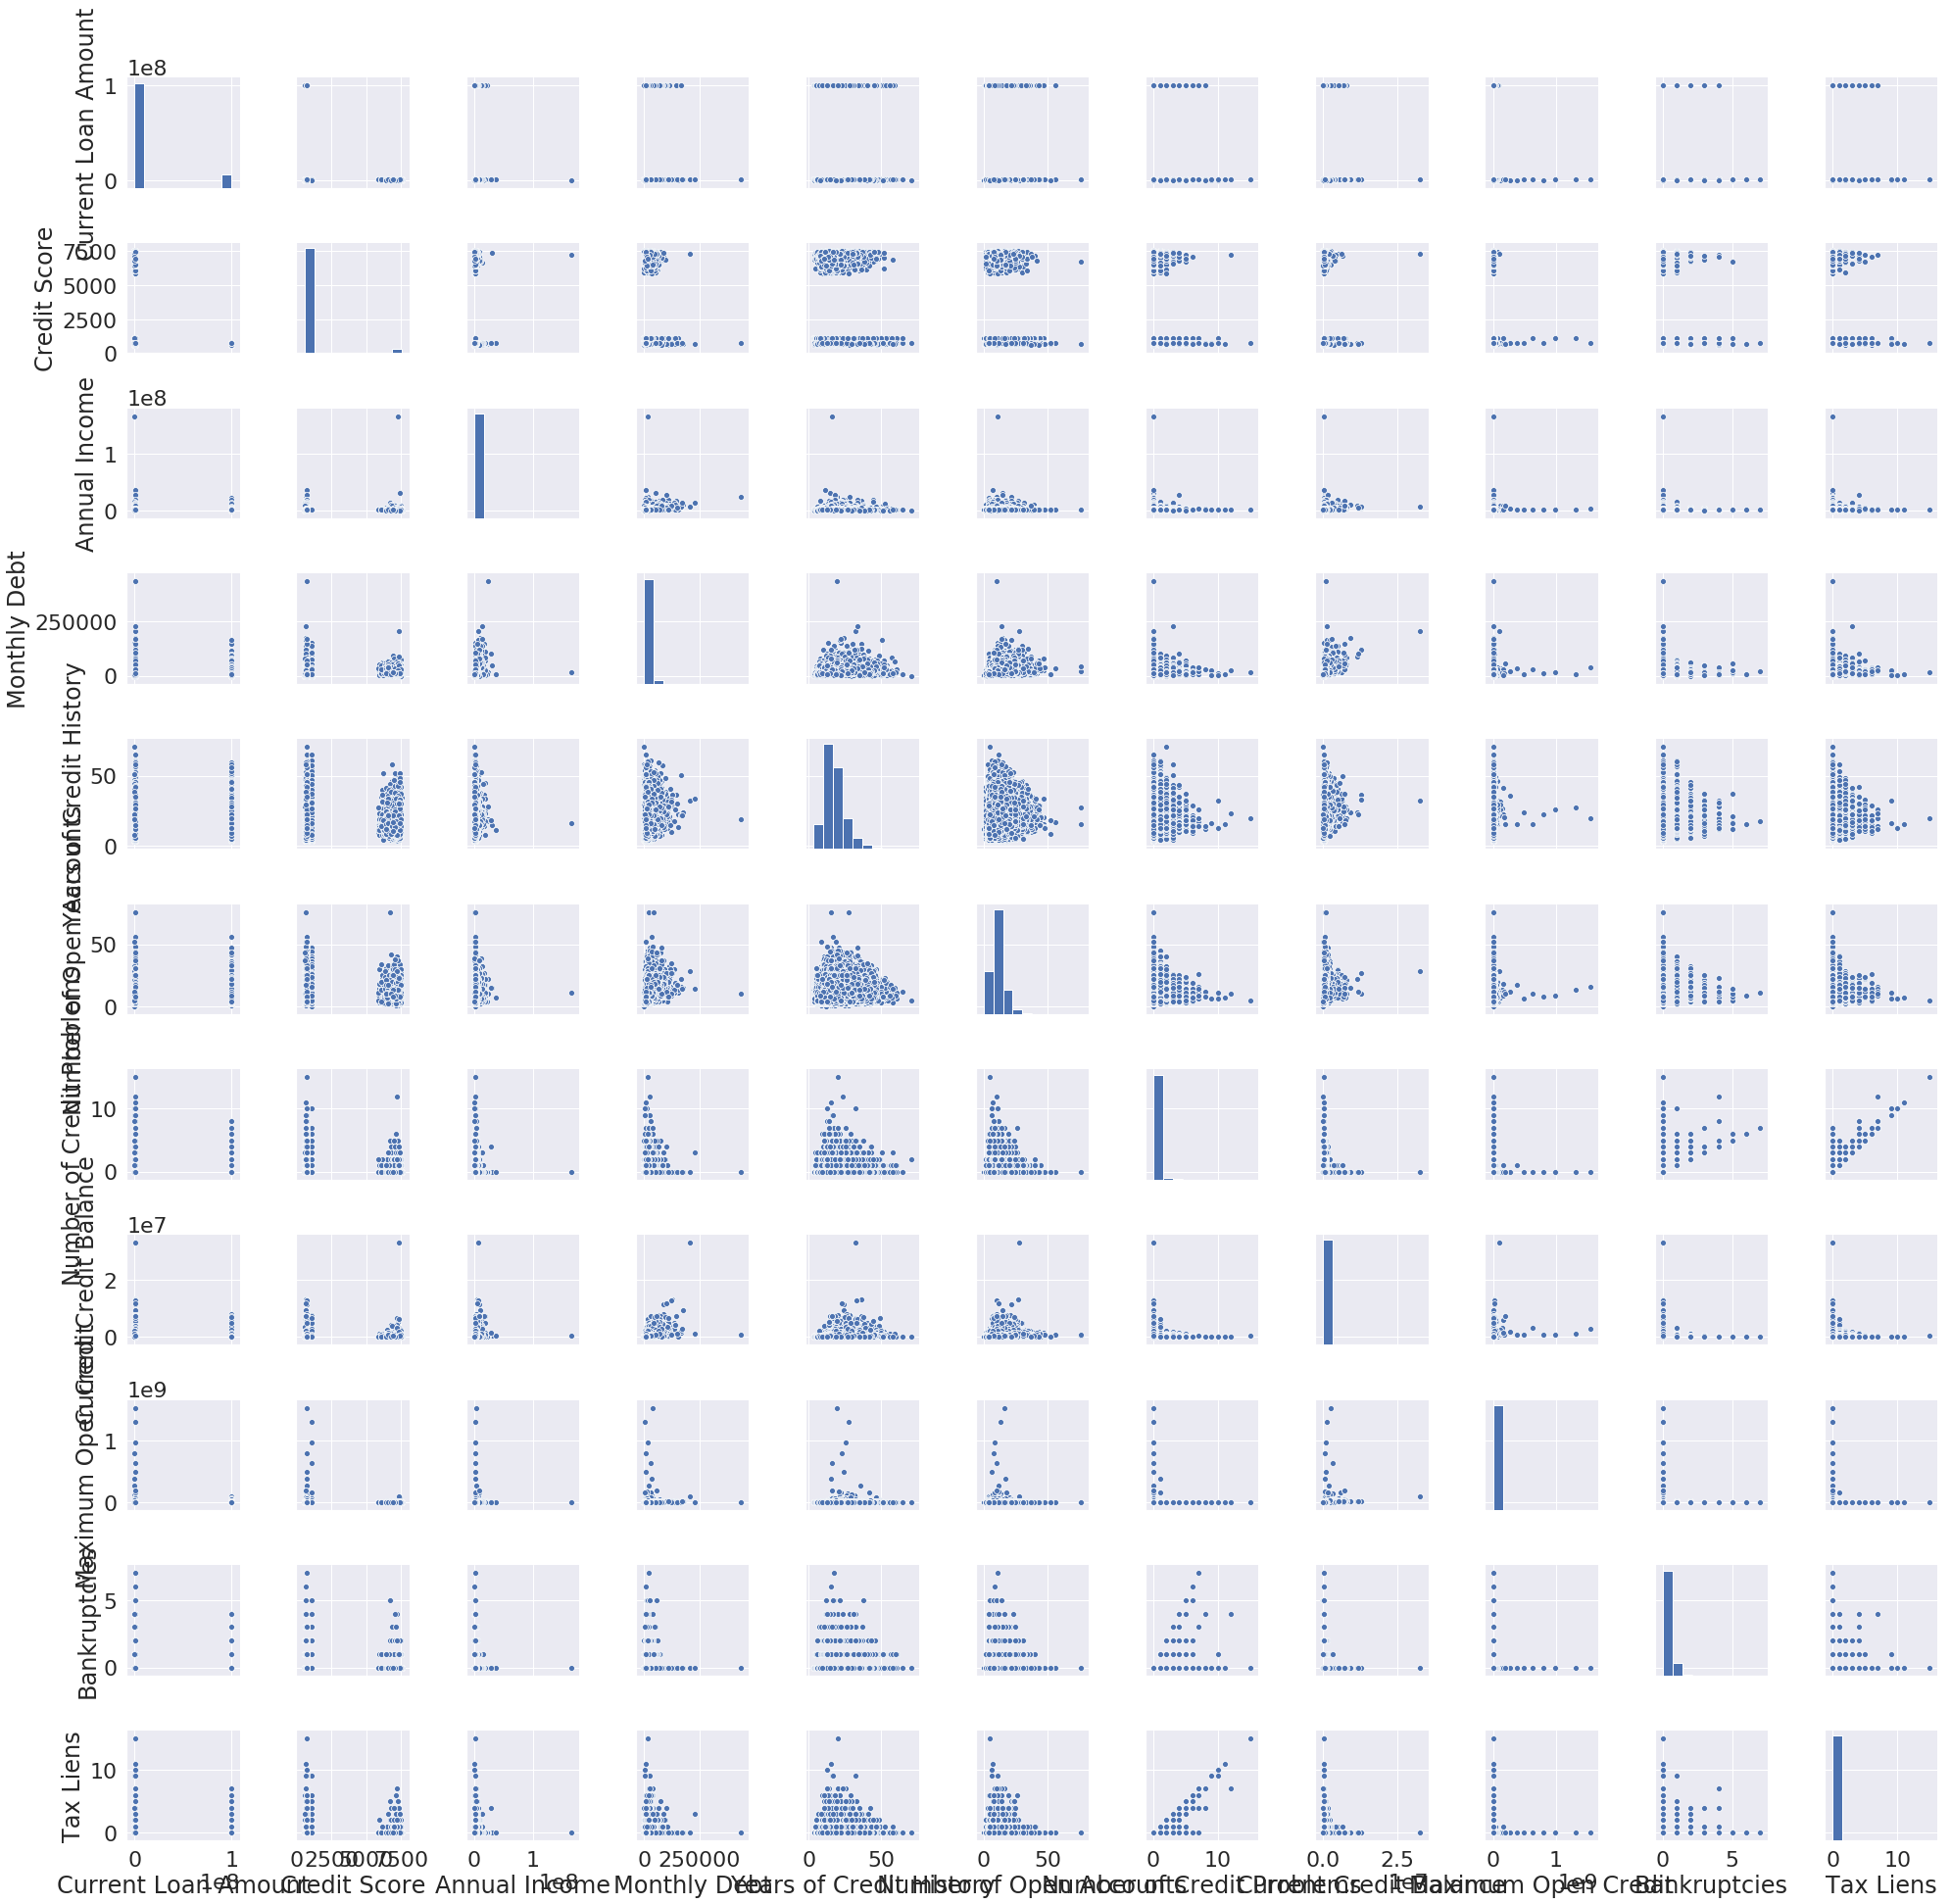

In [23]:
# # # Exploratory Data Analysis

sns.pairplot(credit)

In [24]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = credit.corr()['Credit Score'].sort_values(ascending=False)

# Print the correlations
print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Number of Open Accounts      0.005726
Tax Liens                    0.004765
Current Credit Balance       0.000168
Monthly Debt                -0.001457
Maximum Open Credit         -0.002073
Number of Credit Problems   -0.002785
Bankruptcies                -0.006257
Years of Credit History     -0.008652
Annual Income               -0.016989
Current Loan Amount         -0.095108
Name: Credit Score, dtype: float64>


In [25]:
# # # Feature Engineering and Selection

credit.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [26]:
# # Encoding categorical data & Feature Scaling

# Select the categorical columns
categorical_subset = credit[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the dataframe in credit_train
# Make sure to use axis = 1 to perform a column bind
# First I will drop the 'old' categorical datas and after I will join the 'new' one.

credit.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
credit = pd.concat([credit, categorical_subset], axis = 1)

In [27]:
# #  Remove Collinear Features

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['Loan Status'] = y
               
    return x

In [28]:
# Remove the collinear features above a specified correlation coefficient
credit = remove_collinear_features(credit, 0.6);

In [29]:
credit.shape

(99794, 42)

In [30]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
features = credit.drop(columns='Loan Status')
targets = pd.DataFrame(credit['Loan Status'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79835, 41)
(19959, 41)
(79835, 1)
(19959, 1)


In [31]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passe

In [32]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [33]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [34]:
X_train

array([[-0.36102332, -0.29098075,  0.52858264, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.35523419, -0.26165702,  0.48407171, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.357882  , -0.26165702, -0.35823972, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       ...,
       [-0.36101847, -0.27744672,  0.47657733, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.36255586, -0.25789757, -0.77726096, ..., -0.05147771,
        -0.03206516, -0.0343339 ],
       [-0.35567642, -0.2556419 ,  0.1256506 , ..., -0.05147771,
        -0.03206516, -0.0343339 ]])

In [35]:
X_test

array([[-3.63944227e-01, -2.69927815e-01, -7.23642936e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.62381883e-01, -1.29610336e-03,  4.31089330e-04, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.58970926e-01, -2.93236417e-01,  2.06722719e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       ...,
       [-3.62962737e-01, -2.57145679e-01,  1.03184451e+00, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.59089453e-01, -2.81958061e-01,  1.27927374e-01, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02],
       [-3.63813916e-01, -2.48874885e-01, -4.02692887e-02, ...,
        -5.14777116e-02, -3.20651600e-02, -3.43338961e-02]])

In [36]:
# # # Models to Evaluate

# We will compare five different machine learning Classification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [37]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic Regression Performance on the test set: Cross Validation Score = 0.8197


In [38]:
# # K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

KNN Performance on the test set: Cross Validation Score = 0.7903


In [39]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.4193


In [40]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.8019


In [41]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.8198


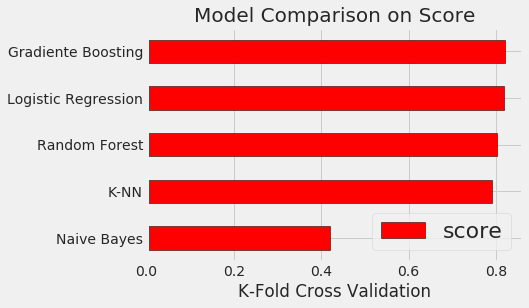

In [42]:
# Now, to better understand the results, I will show in a graph the model that has the better Cross Validation Score

plt.style.use('fivethirtyeight')
figsize=(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'K-NN',
                                           'Naive Bayes', 'Random Forest',
                                            'Gradiente Boosting'],
                                 'score': [logr_cross, knn_cross, naive_cross, 
                                         random_cross, gb_cross]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);

In [43]:
# # # Model Optimization

# # Hyperparameter

# Hyperparameter Tuning with Random Search and Cross Validation

# Here we will implement random search with cross validation to select the optimal hyperparameters for the gradient boosting regressor. 
# We first define a grid then peform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, 
# and then select the hyperparameters with the best performance.

# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [44]:
# In the code below, we create the Randomized Search Object passing in the following parameters:

#    estimator: the model
#    param_distributions: the distribution of parameters we defined
#    cv the number of folds to use for k-fold cross validation
#    n_iter: the number of different combinations to try
#    scoring: which metric to use when evaluating candidates
#    n_jobs: number of cores to run in parallel (-1 will use all available)
#    verbose: how much information to display (1 displays a limited amount)
#    return_train_score: return the training score for each cross-validation fold
#    random_state: fixes the random number generator used so we get the same results every run

In [45]:
# The Randomized Search Object is trained the same way as any other scikit-learn model. 
# After training, we can compare all the different hyperparameter combinations and find the best performing one.

# Create the model to use for hyperparameter tuning
model = XGBClassifier(random_state = 42)

# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [46]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  42 tasks     

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [47]:
# Scikit-learn uses the negative mean absolute error for evaluation because it wants a metric to maximize. 
# Therefore, a better score will be closer to 0. We can get the results of the randomized search into a dataframe, and sort the values by performance.

# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
12,91.512319,0.346897,0.679105,0.006062,500,6,6,None,5,lad,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.180520,-0.178666,-0.179267,-0.181381,-0.179959,0.001059,1,-0.161484,-0.160649,-0.161250,-0.160813,-0.161049,0.000334
21,91.632627,0.410570,0.684043,0.009008,500,6,4,log2,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.180520,-0.178666,-0.179267,-0.181381,-0.179959,0.001059,1,-0.161484,-0.160649,-0.161250,-0.160813,-0.161049,0.000334
3,91.266659,0.372293,0.686890,0.007418,500,6,8,None,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.180520,-0.178666,-0.179267,-0.181381,-0.179959,0.001059,1,-0.161484,-0.160649,-0.161250,-0.160813,-0.161049,0.000334
17,40.641408,0.154432,0.307871,0.005812,500,6,8,None,2,lad,"{'n_estimators': 500, 'min_samples_split': 6, ...",-0.180720,-0.178366,-0.180871,-0.179928,-0.179971,0.000994,4,-0.178335,-0.179488,-0.178769,-0.178616,-0.178802,0.000425
0,20.325406,0.147935,0.123017,0.001374,100,2,6,auto,5,ls,"{'n_estimators': 100, 'min_samples_split': 2, ...",-0.180720,-0.178215,-0.180771,-0.180429,-0.180034,0.001058,5,-0.177918,-0.179037,-0.178519,-0.178366,-0.178460,0.000400
7,57.656717,0.192686,0.422605,0.010961,500,4,6,auto,3,ls,"{'n_estimators': 500, 'min_samples_split': 4, ...",-0.181071,-0.177965,-0.180720,-0.180780,-0.180134,0.001259,6,-0.175229,-0.176415,-0.175947,-0.175627,-0.175804,0.000435
9,57.203267,0.399836,0.420303,0.006054,500,4,2,auto,3,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-0.181071,-0.177965,-0.180720,-0.180780,-0.180134,0.001259,6,-0.175229,-0.176415,-0.175947,-0.175627,-0.175804,0.000435
23,12.024688,0.397924,0.079718,0.002810,100,10,4,sqrt,3,huber,"{'n_estimators': 100, 'min_samples_split': 10,...",-0.181272,-0.178716,-0.180821,-0.180228,-0.180259,0.000965,8,-0.179805,-0.180790,-0.179972,-0.180103,-0.180167,0.000375
14,8.511230,0.112092,0.058840,0.001142,100,6,2,sqrt,2,ls,"{'n_estimators': 100, 'min_samples_split': 6, ...",-0.181422,-0.178566,-0.180871,-0.180329,-0.180297,0.001071,9,-0.179905,-0.180891,-0.180122,-0.180320,-0.180309,0.000366
19,124.781111,0.512352,0.957774,0.006210,1100,6,2,auto,3,lad,"{'n_estimators': 1100, 'min_samples_split': 6,...",-0.180520,-0.179017,-0.180871,-0.181732,-0.180535,0.000981,10,-0.169317,-0.169250,-0.169550,-0.169130,-0.169312,0.000153


In [48]:
random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='huber',
       max_delta_step=0, max_depth=5, max_features=None,
       min_child_weight=1, min_samples_leaf=8, min_samples_split=6,
       missing=None, n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [49]:
# The best gradient boosted model has the following hyperparameters:

# loss = ls
# n_estimators = 100
# max_depth = 5
# min_samples_leaf = 6
# min_samples_split = 2
# max_features = auto 

In [50]:
# I will focus on a single one, the number of trees in the forest (n_estimators).
# By varying only one hyperparameter, we can directly observe how it affects performance. 
# In the case of the number of trees, we would expect to see a significant affect on the amount of under vs overfitting.

# Here we will use grid search with a grid that only has the n_estimators hyperparameter. 
# We will evaluate a range of trees then plot the training and testing performance to get an idea of what increasing the number of trees does for our model. 
# We will fix the other hyperparameters at the best values returned from random search to isolate the number of trees effect.

In [51]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = XGBClassifier(loss = 'ls', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 2,
                                  max_features = 'auto',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [52]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.2min
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 21.3min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=5, max_features='auto',
       min_child_weight=1, min_samples_leaf=6, min_samples_split=2,
       missing=None, n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

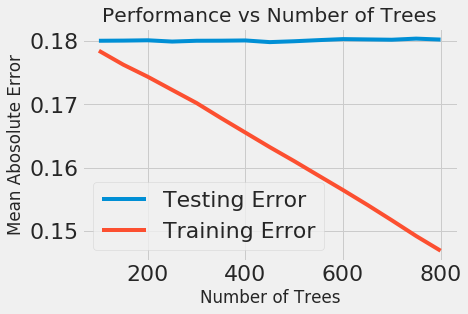

In [53]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize=(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

# There will always be a difference between the training error and testing error (the training error is always lower) but if there is a significant difference, 
# we want to try and reduce overfitting, either by getting more training data or reducing the complexity of the model through hyperparameter tuning or regularization.

# For now, we will use the model with the best performance and accept that it may be overfitting to the training set.

In [54]:
results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
7,82.895718,0.543061,0.616306,0.006222,450,{'n_estimators': 450},-0.180320,-0.178566,-0.179368,-0.181030,-0.179821,0.000934,1,-0.163621,-0.162920,-0.163655,-0.162817,-0.163253,0.000387
3,46.323202,0.200877,0.329054,0.004342,250,{'n_estimators': 250},-0.180720,-0.178115,-0.179819,-0.180980,-0.179909,0.001122,2,-0.172089,-0.172323,-0.172841,-0.171869,-0.172280,0.000361
8,91.440848,0.220871,0.691279,0.005137,500,{'n_estimators': 500},-0.180520,-0.178666,-0.179267,-0.181381,-0.179959,0.001059,3,-0.161484,-0.160649,-0.161250,-0.160813,-0.161049,0.000334
0,18.256797,0.284903,0.120699,0.004451,100,{'n_estimators': 100},-0.180720,-0.178215,-0.180771,-0.180429,-0.180034,0.001058,4,-0.177918,-0.179037,-0.178519,-0.178366,-0.178460,0.000400
4,55.402808,0.157466,0.403368,0.002682,300,{'n_estimators': 300},-0.180169,-0.178616,-0.180620,-0.180730,-0.180034,0.000845,4,-0.170402,-0.170168,-0.170603,-0.169681,-0.170214,0.000344


In [55]:
# # # Evaluate Final Model on the Test Set

# We will use the best model from hyperparameter tuning to make predictions on the testing set.

# For comparison, we can also look at the performance of the default model. The code below creates the final model, trains it (with timing), and evaluates on the test set.

# Default model
default_model = XGBClassifier(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=5, max_features='auto',
       min_child_weight=1, min_samples_leaf=6, min_samples_split=2,
       missing=None, n_estimators=450, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [56]:
%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)

9.75 s ± 96.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [57]:
%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

1min 9s ± 533 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [58]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

# The final model does out-perform the baseline model by about less than 1% and at the cost of significantly increased running time (it's about 7 times slower on my machine). 

# Here, the increase in run time is not an impediment, because while the relative difference is very small, the absolute magnitude of the training time is not significant. 
# In a different situation, the balance might not be the same so we would need to consider what we are optimizing for and the limitations we have to work with.

Default model performance on the test set: MAE = 0.1830.
Final model performance on the test set:   MAE = 0.1818.


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


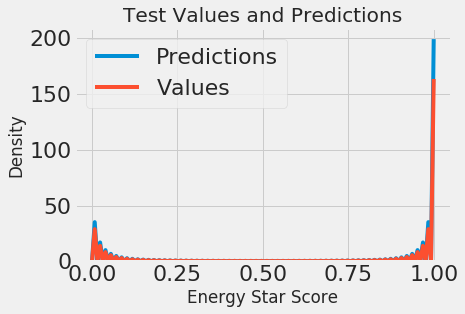

In [59]:
# To get a sense of the predictions, we can plot the distribution of true values on the test set and the predicted values on the test set.

figsize=(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

# The distribution looks to be nearly the same.

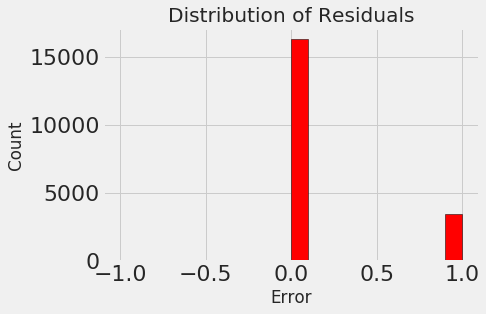

In [60]:
# Another diagnostic plot is a histogram of the residuals. 
# Ideally, we would hope that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low).

figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

# The residuals are very close to zero value, with a one noticeable outliers on the low end. 
# These indicate errors where the model estimate was far below that of the true value.

In [61]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, loss='ls',
       max_delta_step=0, max_depth=5, max_features='auto',
       min_child_weight=1, min_samples_leaf=6, min_samples_split=2,
       missing=None, n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [62]:
# # # Feature Importances

# One of the basic ways we can interpret an ensemble of decision trees is through what are known as the feature importances. 
# These can be interpreted as the variables which are most predictive of the target.

# Extracting the feature importances from a trained ensemble of trees is quite easy in scikit-learn. 
# We will store the feature importances in a dataframe to analyze and visualize them.

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(features.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

# The Credit Score, Current Loan Amount and Annual Income are the three most important features by quite a large margin. After that, Maximum Open Credit, Monthly Debt and Years of Credit History have
# almost the same importance and, Home Ownership_Home Mortgage and Term_Long Term have almost the same importance as well. It indicates that we might not need to retain all of the features 
# to create a model with nearly the same performance.

,feature,importance
0,Credit Score,0.187254
1,Current Loan Amount,0.143890
2,Annual Income,0.123522
3,Maximum Open Credit,0.103811
4,Monthly Debt,0.099869
5,Years of Credit History,0.097240
6,Current Credit Balance,0.072273
7,Number of Open Accounts,0.047963
8,Home Ownership_Home Mortgage,0.021025
9,Term_Long Term,0.020368


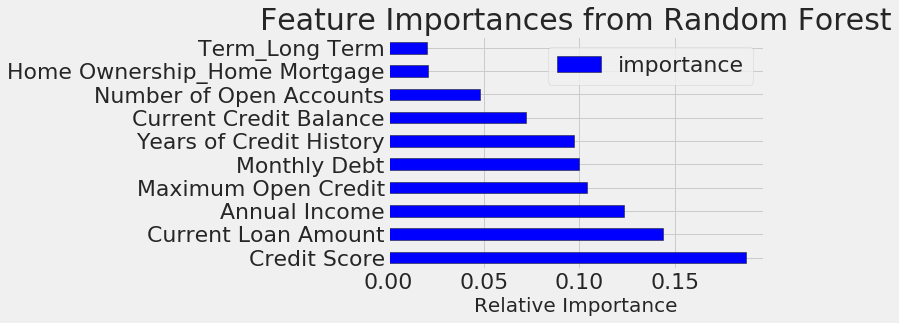

In [63]:
# Let's graph the feature importances to compare visually.

figsize=(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

In [64]:
# # Use Feature Importances for Feature Selection

# Given that not every feature is important for finding the score, what would happen if we used a simpler model, such as a logistic regression, with the subset of most important features from the 
# random forest? The logistic regression did outperform the baseline, but it did not perform well compared to the model complex models. 
# Let's try using only the 6 most important features in the logistic regression to see if performance is improved. We can also limit to these features and re-evaluate the random forest.

# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(features.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_train_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_train_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (79835, 10)
Most important testing  features shape:  (19959, 10)


In [65]:
logr = LogisticRegression()

# Fit on full set of features
logr.fit(X_train, y_train)
logr_full_pred = logr.predict(X_test)

# Fit on reduced set of features
logr.fit(X_train_reduced, y_train)
logr_reduced_pred = logr.predict(X_test_reduced)

# Display results
print('Logistic Regression Full Results: MAE =    %0.4f.' % mae(y_test, logr_full_pred))
print('Logistic Regression Reduced Results: MAE = %0.4f.' % mae(y_test, logr_reduced_pred))

# Well, reducing the features did improve the linear regression results little beat! 
# It turns out that the extra information in the features with soft importance do actually improve performance.

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Full Results: MAE =    0.1834.
Logistic Regression Reduced Results: MAE = 0.1830.


In [66]:
# Let's look at using the reduced set of features in the gradient boosted regressor. How is the performance affected?

# Create the model with the same hyperparamters
model_reduced = XGBClassifier(loss='ls', max_depth=5, max_features='auto',
                                  min_samples_leaf=6, min_samples_split=2, 
                                  n_estimators=450, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_train_reduced, y_train)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

# The model results are slightly worse with the reduced set of features and we will keep all of the features for the final model.

Gradient Boosted Reduced Results: MAE = 0.1831


In [67]:
# # Locally Interpretable Model-agnostic Explanations (LIME)

# We will look at using LIME to explain individual predictions made the by the model. 
#LIME is a relatively new effort aimed at showing how a machine learning model thinks by approximating the region around a prediction with a linear model.

# We will look at trying to explain the predictions on an example the model gets very wrong and an example the model gets correct. 
#We will restrict ourselves to using the reduced set of 10 features to aid interpretability. 
#The model trained on the 10 most important features is slightly less accurate, but we generally have to trade off accuracy for interpretability!

In [68]:
# Find the residuals
residuals = abs(model_reduced_pred - y_test)
    
# Exact the worst and best prediction
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [69]:
# Create a lime explainer object

# LIME for explaining predictions
import lime 
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train_reduced, 
                                                   mode = 'classification',
                                                   training_labels = y_train,
                                                   feature_names = list(most_important_features))

Prediction: 1.0000
Actual Value: 0.0000


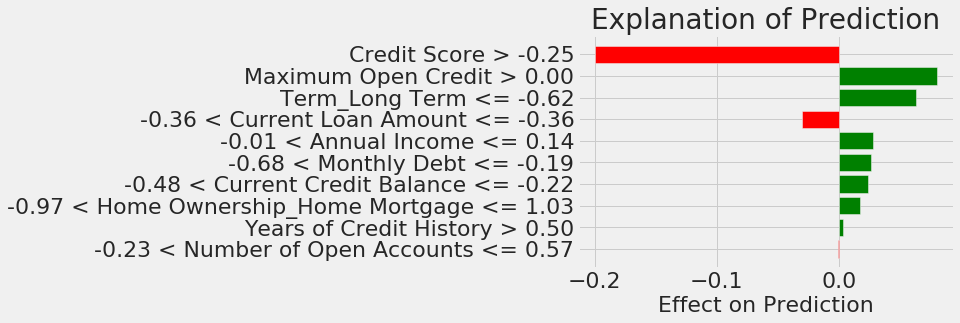

In [70]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict_proba,
                                      num_features=10)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

# In this example, our gradient boosted model predicted a score of 1.0 and the actual value was 0.0.

# The plot from LIME is showing us the contribution to the final prediction from each of the features for the example.

# We can see that the Credit Score singificantly decreased the prediction when we comparing with the others. 
# The Maximum Open Credit on the other hand, incresed the prediction when we comparing with the others.

Prediction: 1.0000
Actual Value: 1.0000


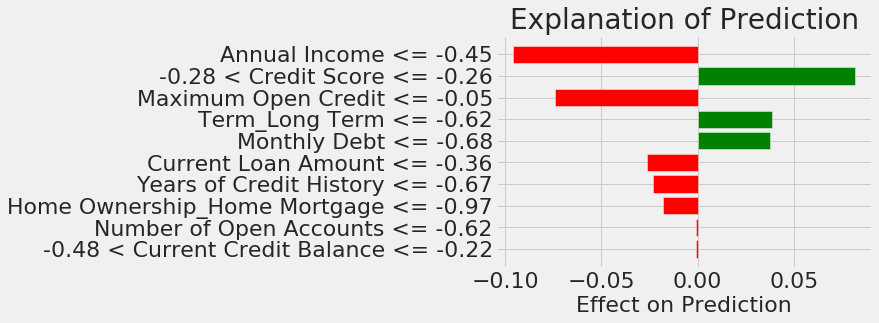

In [71]:
# Now we can go through the same process with a prediction the model got correct.

# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict_proba, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

# The correct value for this case was 1.0 which our gradient boosted model got right on!

# The plot from LIME again shows the contribution to the prediciton of each of feature variables for the example.

# Observing break down plots like these allow us to get an idea of how the model makes a prediction. 
# This is probably most valuable for cases where the model is off by a large amount as we can inspect the errors and perhaps engineer better features or adjust the hyperparameters of the model 
# to improve predictions for next time. The examples where the model is off the most could also be interesting edge cases to look at manually.

In [72]:
# A process such as this where we try to work with the machine learning algorithm to gain understanding of a problem seems much better than simply letting the model make predictions
# and completely trusting them! Although LIME is not perfect, it represents a step in the right direction towards explaining machine learning models.

In [73]:
# Good job with this project!
# See you in the next one!!!

In [74]:
# I will use in this Kernel the step-by-step process of Will Koehrsen.
# I won't use everything, but most of them.
# This project at in GitHub repository: https://github.com/WillKoehrsen/machine-learning-project-walkthrough